In [117]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

In [94]:
## Question 1: Data import

df = pd.read_excel(r'C:\Users\shaun.rolph\Desktop\Assignmentfour\Food_Environment_Atlas.xlsx', sheet_name='Sheet1')
print(df)

         FIPS State.x County.x  LACCESS_POP10  LACCESS_POP15  \
0      1001.0      AL  Autauga   18428.439685   17496.693038   
1      1003.0      AL  Baldwin   35210.814078   30561.264430   
2      1005.0      AL  Barbour    5722.305602    6069.523628   
3      1007.0      AL     Bibb    1044.867327     969.378841   
4      1009.0      AL   Blount    1548.175559    3724.428242   
...       ...     ...      ...            ...            ...   
3221  72131.0     NaN      NaN            NaN            NaN   
3222  72137.0     NaN      NaN            NaN            NaN   
3223  72143.0     NaN      NaN            NaN            NaN   
3224  72151.0     NaN      NaN            NaN            NaN   
3225  46102.0     NaN      NaN            NaN            NaN   

      PCH_LACCESS_POP_10_15  PCT_LACCESS_POP10  PCT_LACCESS_POP15  \
0                 -5.056026          33.769657          32.062255   
1                -13.204891          19.318473          16.767489   
2                  6.067

In [95]:
## Question 1: Data exploration and cleaning nulls
df.head()

,FIPS,State.x,County.x,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,Pop2020,State.y,County.y,Economic_Type_String,Type_Farming,Type_Mining,Type_Manufacturing,Type_Government,Type_Recreation,Type_Nonspecialized
0,1001.0,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,58805.0,AL,Autauga County,Nonspecialized,0.0,0.0,0.0,0.0,0.0,1.0
1,1003.0,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,231767.0,AL,Baldwin County,Recreation,0.0,0.0,0.0,0.0,1.0,0.0
2,1005.0,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,25223.0,AL,Barbour County,Maufacturing,0.0,0.0,1.0,0.0,0.0,0.0
3,1007.0,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,22293.0,AL,Bibb County,Nonspecialized,0.0,0.0,0.0,0.0,0.0,1.0
4,1009.0,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,59134.0,AL,Blount County,Nonspecialized,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
df.describe()

,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,...,PERCHLDPOV10,METRO13,POPLOSS10,Pop2020,Type_Farming,Type_Mining,Type_Manufacturing,Type_Government,Type_Recreation,Type_Nonspecialized
count,3225.000000,3143.000000,3124.000000,3.117000e+03,3143.000000,3124.000000,3143.000000,3123.000000,3.115000e+03,3143.000000,...,3143.000000,3143.000000,3141.000000,3.221000e+03,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,31377.189457,20156.653242,19287.747386,7.180008e+03,23.559330,23.084470,5551.776559,5833.959524,7.318957e+03,8.374953,...,0.225262,0.371301,0.168418,1.039227e+05,0.161311,0.081451,0.164174,0.146675,0.136176,0.393573
std,16309.794754,51308.865791,47803.525596,3.955676e+05,20.250176,19.602745,13862.922934,13989.348252,4.004692e+05,8.214988,...,0.417822,0.483230,0.374296,3.318914e+05,0.367876,0.273570,0.370493,0.353838,0.343030,0.488620
min,1001.000000,0.000000,0.000000,-1.000000e+02,0.000000,0.000000,0.000000,0.000000,-1.000000e+02,0.000000,...,0.000000,0.000000,0.000000,6.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19029.000000,1661.076794,1631.358726,-1.091343e+01,10.847099,10.927326,592.983070,608.235919,-1.232638e+01,3.442171,...,0.000000,0.000000,0.000000,1.097600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30023.000000,4097.827186,4131.174278,-6.239322e-02,19.685956,19.200682,1500.780036,1636.858816,3.486028e+00,6.150772,...,0.000000,0.000000,0.000000,2.582800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46107.000000,12954.123206,13119.029389,7.262080e+00,29.581054,28.862231,4591.067541,4859.016156,2.352342e+01,10.324935,...,0.000000,1.000000,0.000000,6.726000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,72153.000000,886068.668386,740267.412661,2.208376e+07,100.000001,100.000001,292541.789025,259479.516033,2.234893e+07,72.274456,...,1.000000,1.000000,1.000000,1.001401e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
df.Economic_Type_String.value_counts()

Nonspecialized              1237
Maufacturing                 501
Farming                      444
Federal/State Government     407
Recreation                   333
Mining                       221
Name: Economic_Type_String, dtype: int64

In [98]:
df.shape[0]

3226

In [99]:
df.dropna(subset=['Economic_Type_String'], inplace=True)

In [100]:
df.shape[0]

3143

In [101]:
columns_to_drop = ['Type_Farming', 'Type_Mining', 'Type_Manufacturing','Type_Government', 'Type_Recreation', 'Type_Nonspecialized']
df.drop(columns= columns_to_drop, inplace=True)

In [102]:
df.head()

,FIPS,State.x,County.x,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10,Pop2020,State.y,County.y,Economic_Type_String
0,1001.0,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,12.7,0.0,18.8,0.0,1.0,0.0,58805.0,AL,Autauga County,Nonspecialized
1,1003.0,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,12.9,0.0,19.6,0.0,1.0,0.0,231767.0,AL,Baldwin County,Recreation
2,1005.0,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,32.0,1.0,45.2,1.0,0.0,0.0,25223.0,AL,Barbour County,Maufacturing
3,1007.0,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,22.2,0.0,29.3,1.0,1.0,0.0,22293.0,AL,Bibb County,Nonspecialized
4,1009.0,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,14.7,0.0,22.2,0.0,1.0,0.0,59134.0,AL,Blount County,Nonspecialized


In [103]:
nulls_per_Row= df.isnull().sum(axis=1)

In [104]:
print(nulls_per_Row.sort_values(ascending=False))

92      116
2926    108
2916    102
548      99
2915     99
       ... 
2245      0
214       0
2310      0
2806      0
1981      0
Length: 3143, dtype: int64


In [105]:
df_clean = df.dropna(axis=1, thresh=(len(df)*.1), inplace=False)

In [106]:
df_clean.shape[0]

3143

In [107]:
## Separate df for just target variable 
df_target=pd. DataFrame()
df_target["Economic_Type_String"]= df["Economic_Type_String"]
print(df_target)

     Economic_Type_String
0          Nonspecialized
1              Recreation
2            Maufacturing
3          Nonspecialized
4          Nonspecialized
...                   ...
3138               Mining
3139           Recreation
3140               Mining
3141       Nonspecialized
3142               Mining

[3143 rows x 1 columns]


In [108]:
## Question 2: Prepping and imputing for PCA
df_clean = df_clean._get_numeric_data()

In [109]:
columns_to_drop = ['FIPS']
df_clean.drop(columns= columns_to_drop, inplace=True)

In [110]:
df_clean.head()

,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10,Pop2020
0,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,22.439248,9.793530,11.991125,...,11.995382,26.777959,56580.0,12.7,0.0,18.8,0.0,1.0,0.0,58805.0
1,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,-0.656270,5.460261,5.424427,...,16.771185,22.987408,52387.0,12.9,0.0,19.6,0.0,1.0,0.0,231767.0
2,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,-5.959985,11.420316,10.739667,...,14.236807,21.906982,31433.0,32.0,1.0,45.2,1.0,0.0,0.0,25223.0
3,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,21.307144,2.144661,2.601627,...,12.681650,22.696923,40767.0,22.2,0.0,29.3,1.0,1.0,0.0,22293.0
4,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,171.081177,1.062468,2.880150,...,14.722096,24.608353,50487.0,14.7,0.0,22.2,0.0,1.0,0.0,59134.0


In [111]:
## Question 2: Imputing
from sklearn.impute import KNNImputer

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=2)

# KNN imputation
knn_imputed = knn_imputer.fit_transform(df_clean)

# Convert back to DataFrame
knn_imputed_df = pd.DataFrame(knn_imputed, columns=df_clean.columns)

print("KNN imputation:")
print(knn_imputed_df)


KNN imputation:
      LACCESS_POP10  LACCESS_POP15  PCH_LACCESS_POP_10_15  PCT_LACCESS_POP10  \
0      18428.439685   17496.693038              -5.056026          33.769657   
1      35210.814078   30561.264430             -13.204891          19.318473   
2       5722.305602    6069.523628               6.067799          20.840972   
3       1044.867327     969.378841              -7.224696           4.559753   
4       1548.175559    3724.428242             140.568857           2.700840   
...             ...            ...                    ...                ...   
3138   13391.715505   18934.737809              41.391428          30.570505   
3139    6212.423697    6212.390430              -0.000535          29.174527   
3140    4270.147119    4686.017653               9.739021          20.220414   
3141     931.411647     931.411647               0.000000          10.915407   
3142    1240.493102    1237.267037              -0.260063          17.209949   

      PCT_LACCESS_POP15

In [112]:
##standardize data

scaler = StandardScaler()
df_SD = pd.DataFrame(scaler.fit_transform(knn_imputed_df),columns = knn_imputed_df.columns)
df_SD.head()

,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10,Pop2020
0,-0.033688,-0.035392,-0.018092,0.504290,0.454134,-0.014959,0.053223,-0.018142,0.172709,0.395811,...,-0.927824,0.995224,0.644629,-0.552296,-0.355701,-0.474410,-0.539221,1.301242,-0.450752,-0.138942
1,0.293449,0.238665,-0.018113,-0.209457,-0.324055,0.317470,0.292896,-0.018199,-0.354858,-0.387543,...,0.212110,-0.127991,0.305065,-0.521234,-0.355701,-0.388913,-0.539221,1.301242,-0.450752,0.376272
2,-0.281367,-0.275102,-0.018064,-0.134260,-0.052457,-0.174313,-0.204496,-0.018213,0.370767,0.246522,...,-0.392819,-0.448143,-1.391863,2.445155,2.811349,2.346964,1.854526,-0.768497,-0.450752,-0.238975
3,-0.372544,-0.382088,-0.018097,-0.938392,-0.961938,-0.365084,-0.373157,-0.018144,-0.758526,-0.724281,...,-0.764019,-0.214068,-0.635963,0.923133,-0.355701,0.647728,1.854526,1.301242,-0.450752,-0.247703
4,-0.362733,-0.324295,-0.017722,-1.030204,-0.846592,-0.356601,-0.297538,-0.017769,-0.890281,-0.691055,...,-0.276986,0.352327,0.151196,-0.241679,-0.355701,-0.111051,-0.539221,1.301242,-0.450752,-0.137962


In [113]:
##Question 3: PCA

pca = PCA(n_components=15)
pca_arr = pca.fit_transform(df_SD)


In [115]:
## Transform the data to principal components
X_pca = pca.transform(df_SD)

# Create a DataFrame with PC1 and PC2
df_pca = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])

# Sample 100-500 points
sample_size = np.random.randint(100, 501)
df_sampled = df_pca.sample(sample_size, random_state=42)

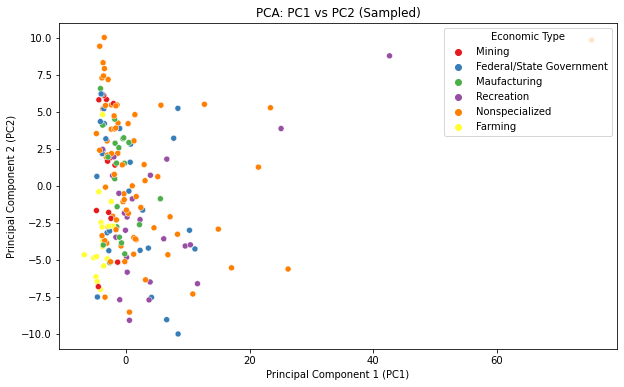

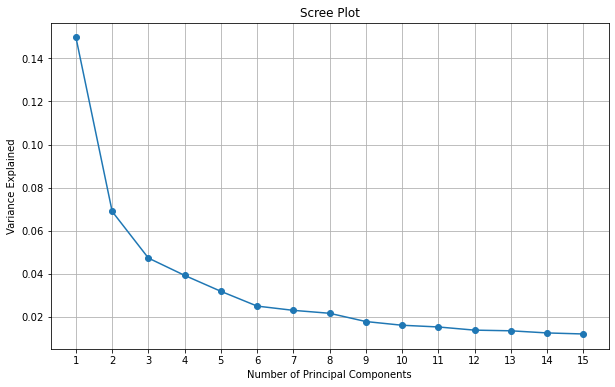

In [127]:
## Plot the scatterplot with colored points by county economic type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_sampled, hue=df.loc[df_sampled.index, 'Economic_Type_String'], palette='Set1')
plt.title('PCA: PC1 vs PC2 (Sampled)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Economic Type', loc='upper right')
plt.show()

##Quesiton 4: Scree plot for variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

<Figure size 864x864 with 0 Axes>

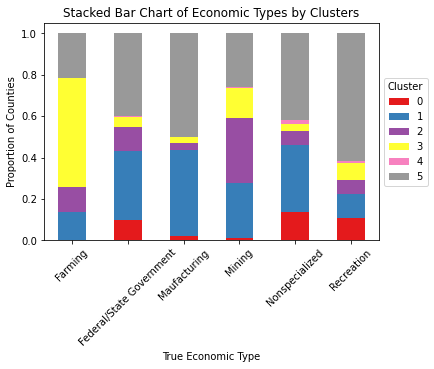

Observed Accuracy in Predicting Each County's Economic Type:
Farming: 52.70%
Federal/State Government: 39.80%
Maufacturing: 49.90%
Mining: 31.67%
Nonspecialized: 41.88%
Recreation: 61.56%


In [136]:
## Quesiton 5

from sklearn.cluster import KMeans

## Run k-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca)

## Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

## Create a DataFrame to store the cluster counts for each economic type
cluster_counts = df.groupby(['Economic_Type_String', 'Cluster']).size().unstack(fill_value=0)


## Quesiton 6
# Normalize cluster counts to create a stacked bar chart
cluster_counts_norm = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

## Plot a stacked bar chart
plt.figure(figsize=(12, 12))
cluster_counts_norm.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Stacked Bar Chart of Economic Types by Clusters')
plt.xlabel('True Economic Type')
plt.ylabel('Proportion of Counties')
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()


## Quesiton 7
## Calculate observed accuracy for each economic type
accuracy = {}
for economic_type, counts in cluster_counts.iterrows():
    observed_accuracy = counts.max() / counts.sum()
    accuracy[economic_type] = observed_accuracy

print("Observed Accuracy in Predicting Each County's Economic Type:")
for economic_type, acc in accuracy.items():
    print(f"{economic_type}: {acc:.2%}")


<Figure size 864x576 with 0 Axes>

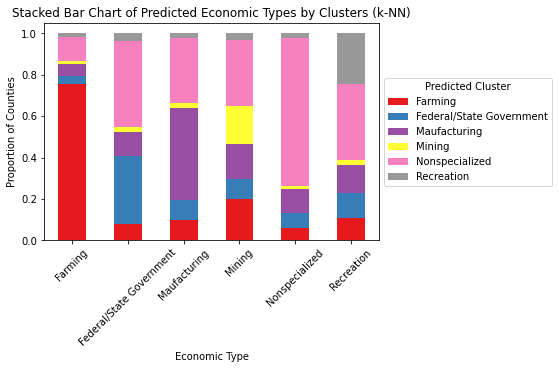

Accuracy of k-NN for Each Economic Type:
Nonspecialized: 71.22%
Recreation: 24.62%
Maufacturing: 44.71%
Federal/State Government: 32.92%
Mining: 18.10%
Farming: 75.68%


In [135]:
## Quesiton 8

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Split data into features (X) and target labels (y)
X = df_pca
y = df['Economic_Type_String']

## Train a k-NN model
knn = KNeighborsClassifier(n_neighbors=6)  # Considering 6 economic types
knn.fit(X, y)

## Predict economic types for each county
y_pred = knn.predict(X)

## Add predicted labels to the DataFrame
df['Predicted_Economic_Type'] = y_pred

## Create a DataFrame to store the predicted cluster counts for each economic type
predicted_counts = df.groupby(['Economic_Type_String', 'Predicted_Economic_Type']).size().unstack(fill_value=0)

## Normalize predicted cluster counts to create a stacked bar chart
predicted_counts_norm = predicted_counts.div(predicted_counts.sum(axis=1), axis=0)

## Plot a stacked bar chart for predicted economic types
plt.figure(figsize=(12, 8))
predicted_counts_norm.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Stacked Bar Chart of Predicted Economic Types by Clusters (k-NN)')
plt.xlabel('Economic Type')
plt.ylabel('Proportion of Counties')
plt.legend(title='Predicted Cluster', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

## Calculate accuracy of k-NN for each economic type
accuracy_by_type = {}

for economic_type in df['Economic_Type_String'].unique():
    mask = df['Economic_Type_String'] == economic_type
    accuracy_by_type[economic_type] = accuracy_score(df.loc[mask, 'Economic_Type_String'], df.loc[mask, 'Predicted_Economic_Type'])

## Print accuracy for each economic type
print("Accuracy of k-NN for Each Economic Type:")
for economic_type, acc in accuracy_by_type.items():
    print(f"{economic_type}: {acc:.2%}")